# Assignment 6

### Daniel Contente Romanzini - S6148042
### Rafael Sartori Vantin - S6149898

# Bayesian Networks for Evidence Lab

In this lab, you will investigate how Bayesian Networks can be used to reason with evidence. You can earn 60 points in total.

We'll be working with the PyAgrum package. If you get stuck with the Bayesian Network, check out the following tutorial:
https://pyagrum.readthedocs.io/en/1.9.0/notebooks/01-Tutorial.html

Hand in: This notebook and a pdf version of this notebook:
- Convert this Jupyter Notebook to PDF
- include all images/BNs you generated, with your answers to the questions and any code you might have written
- Make sure to add your names to both files

# Part I: Probabilistic Reasoning (25p)

## Question 1: Drunk Driving (15p)

The police is interested in whether people are driving drunk. Therefore, they sometimes set up a "fuik", or a trap, where they block a road and test everyone that passes for drunk driving. In this case, they use a test. Like any test, this test is not perfect. If a person is drunk, the test reports positive for drunkenness 99.99% of the time. If the person is not drunk, the test reports positive for drunkenness 5% of the time. This exercise is about probabilistic reasoning in this situation.

**a. Assume that 0% of drivers drives drunk. Draw a probability tree diagram representing the two relevant random variables, all probabilities, and the probabilities of every possible outcome (2p)**

**b. Without calculating, do you expect that if someone tested positively, they were drunk? Why? (2p)**


**c. What is the probability that someone is drunk, given that they tested positively? Show your calculation. Is this a higher or lower probability than you expected? (2p)**



**d. What should the probability of $\Pr(\text{Drunk=true})$ be in order to have a 99% posterior probability or higher of the driver being drunk when they test positively? (2p)**


**e. Given that the police cannot get access to a more accurate test, what could they do to improve their chances of catching drunk drivers and reducing the number of false positive innocent people? (2p)**



**f. Using your answers to the previous questions, explain why "base rate neglect" can be relevant in court (5p)**





In [25]:
import graphviz
from IPython.display import Image
from sympy import symbols, Eq, solve
import numpy as np

**a.**

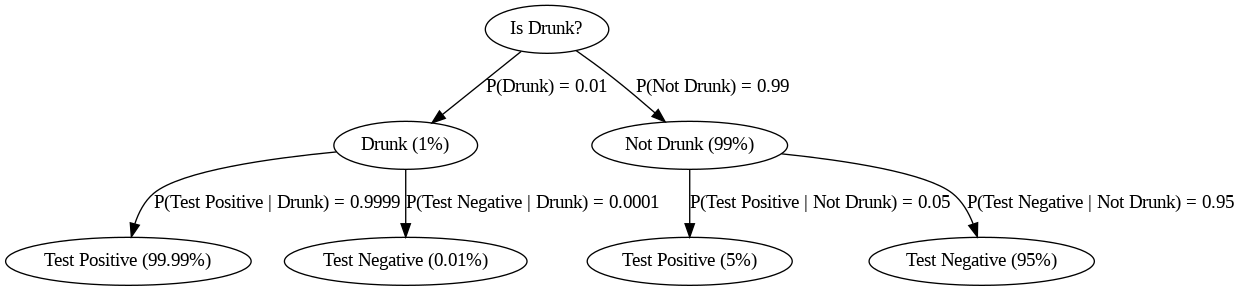

In [12]:
tree = graphviz.Digraph()

# First layer
tree.node('D', 'Is Drunk?')
tree.node('D1', 'Drunk (1%)')
tree.node('D2', 'Not Drunk (99%)')

tree.edge('D', 'D1', label='P(Drunk) = 0.01')
tree.edge('D', 'D2', label='P(Not Drunk) = 0.99')

# Second layer - if drunk
tree.node('T1', 'Test Positive (99.99%)')
tree.node('T2', 'Test Negative (0.01%)')

tree.edge('D1', 'T1', label='P(Test Positive | Drunk) = 0.9999')
tree.edge('D1', 'T2', label='P(Test Negative | Drunk) = 0.0001')

# Second layer - if not drunk
tree.node('T3', 'Test Positive (5%)')
tree.node('T4', 'Test Negative (95%)')

tree.edge('D2', 'T3', label='P(Test Positive | Not Drunk) = 0.05')
tree.edge('D2', 'T4', label='P(Test Negative | Not Drunk) = 0.95')

tree.render('drunk_driving_tree', format='png', view=False)
Image(filename='drunk_driving_tree.png')

**b.**

Yes, we do. Because, given that the person is drunk, the accuracy of the test is 99,99%.

**c.**

In [26]:
P_drunk = 0.01
P_not_drunk = 1 - P_drunk

P_test_positive_given_drunk = 0.9999
P_test_negative_given_drunk = 1 - P_test_positive_given_drunk
P_test_positive_given_not_drunk = 0.05
P_test_negative_given_not_drunk = 1 - P_test_positive_given_not_drunk

# P(Test positive)
P_test_positive = (P_test_positive_given_drunk * P_drunk) + (P_test_positive_given_not_drunk * P_not_drunk)
P_test_negative = 1 - P_test_positive

# P(Drunk | Test positive)
P_drunk_given_test_positive = (P_test_positive_given_drunk * P_drunk) / P_test_positive

P_drunk_given_test_positive

0.1680532445923461

This is definitely lower than I expected.

**d.**

In [ ]:
# Define the unknown variable
P_drunk_true = symbols('P_drunk_true')

# Calculate P(Test positive) as a function of P(Drunk=true)
P_test_positive = (P_test_positive_given_drunk * P_drunk_true) + (P_test_positive_given_not_drunk * (1 - P_drunk_true))

# Set the posterior probability to 0.99 and solve for P(Drunk=true)
bayes_eq = Eq((P_test_positive_given_drunk * P_drunk_true) / P_test_positive, 0.99)

# Solve for P(Drunk=true)
P_drunk_true_solution = solve(bayes_eq, P_drunk_true)

# Display the result
P_drunk_true_solution

[0.831946755407654]

P(drunk=True) should be >= 0,83.

**e.**

There are a few things they could do:
- Conduct the tests on a place where drunk driving in more likely, thus increasing P(drunk=True).
- Redo the test for the same person: the overall likelihood of false positives decreases.

**f.**

Base rate neglect is relevant in court because it affects the interpretation of results. A solid understanding of statistics, in this case, would provide a fairer trial and prevent misjudgments.


## Question 2: Factorizing (10p)

**We have the following joint probability distribution over $\Pr(P, Q)$:
$\Pr(P=p,Q=q)=0.06, \Pr(P=p,Q=\neg q) = 0.04, \Pr(P=\neg p, Q=q) =0.72, \Pr(P=\neg p, Q=\neg q) = 0.18$.**

**a. From this joint distribution, calculate the conditional probability tables (CPTs) for each node, given the Bayesian Network graph $P \rightarrow Q$. Show your work. (3p)**

Hint 1: Given this structure, what are the parameters that you need to find?

Hint 2: use $\Pr(P\mid Q)\Pr(Q) = \Pr(P \land Q)$ and Bayes' Theorem.

**b. Is it possible to represent this joint probability distribution in the Bayesian Network graph $Q \rightarrow P$? If no, explain why not. If yes, show the resulting network, including CPTs. (3p)**


**c. Is it possible to represent this joint probability distribution in the Bayesian Network graph $Q  P$? If no, explain why not. If yes, show the result. (3p)**

**d.  What would be a reason to prefer one graph structure over another if both represent the same joint probability distribution? (1p)**


In [27]:
class BayesianNetwork:
    def __init__(self):
        self.joint_dist = {
            ('p', 'q'): 0.06,
            ('p', 'not_q'): 0.04,
            ('not_p', 'q'): 0.72,
            ('not_p', 'not_q'): 0.18
        }

        self.marginals = self.calculate_marginals()

    def calculate_marginals(self):
        p_p = sum(prob for (p, _), prob in self.joint_dist.items() if p == 'p')
        p_not_p = sum(prob for (p, _), prob in self.joint_dist.items() if p == 'not_p')
        p_q = sum(prob for (_, q), prob in self.joint_dist.items() if q == 'q')
        p_not_q = sum(prob for (_, q), prob in self.joint_dist.items() if q == 'not_q')

        return {
            'P(p)': p_p,
            'P(¬p)': p_not_p,
            'P(q)': p_q,
            'P(¬q)': p_not_q
        }

    def calculate_p_to_q_cpts(self):

        cpt_p = {
            'p': self.marginals['P(p)'],
            'not_p': self.marginals['P(¬p)']
        }

        # Calculate P(Q|P)
        cpt_q_given_p = {
            ('p', 'q'): self.joint_dist[('p', 'q')] / self.marginals['P(p)'],
            ('p', 'not_q'): self.joint_dist[('p', 'not_q')] / self.marginals['P(p)'],
            ('not_p', 'q'): self.joint_dist[('not_p', 'q')] / self.marginals['P(¬p)'],
            ('not_p', 'not_q'): self.joint_dist[('not_p', 'not_q')] / self.marginals['P(¬p)']
        }

        return cpt_p, cpt_q_given_p

    def calculate_q_to_p_cpts(self):

        cpt_q = {
            'q': self.marginals['P(q)'],
            'not_q': self.marginals['P(¬q)']
        }

        cpt_p_given_q = {
            ('q', 'p'): self.joint_dist[('p', 'q')] / self.marginals['P(q)'],
            ('q', 'not_p'): self.joint_dist[('not_p', 'q')] / self.marginals['P(q)'],
            ('not_q', 'p'): self.joint_dist[('p', 'not_q')] / self.marginals['P(¬q)'],
            ('not_q', 'not_p'): self.joint_dist[('not_p', 'not_q')] / self.marginals['P(¬q)']
        }

        return cpt_q, cpt_p_given_q

    def verify_independence(self):

        # Check if P(P,Q) = P(P)P(Q)
        for (p_val, q_val), joint_prob in self.joint_dist.items():
            p_marg = self.marginals['P(p)'] if p_val == 'p' else self.marginals['P(¬p)']
            q_marg = self.marginals['P(q)'] if q_val == 'q' else self.marginals['P(¬q)']
            if not np.isclose(joint_prob, p_marg * q_marg, rtol=1e-10):
                return False
        return True

**a.**

In [23]:
bn = BayesianNetwork()

cpt_p, cpt_q_given_p = bn.calculate_p_to_q_cpts()
print("\nP(P):")
for k, v in cpt_p.items():
    print(f"P({k}) = {v:.4f}")
print("\nP(Q|P):")
for k, v in cpt_q_given_p.items():
    print(f"P(Q={k[1]}|P={k[0]}) = {v:.4f}")

cpt_q, cpt_p_given_q = bn.calculate_q_to_p_cpts()
print("\nP(Q):")
for k, v in cpt_q.items():
    print(f"P({k}) = {v:.4f}")
print("\nP(P|Q):")
for k, v in cpt_p_given_q.items():
    print(f"P(P={k[1]}|Q={k[0]}) = {v:.4f}")


P(P):
P(p) = 0.1000
P(not_p) = 0.9000

P(Q|P):
P(Q=q|P=p) = 0.6000
P(Q=not_q|P=p) = 0.4000
P(Q=q|P=not_p) = 0.8000
P(Q=not_q|P=not_p) = 0.2000

P(Q):
P(q) = 0.7800
P(not_q) = 0.2200

P(P|Q):
P(P=p|Q=q) = 0.0769
P(P=not_p|Q=q) = 0.9231
P(P=p|Q=not_q) = 0.1818
P(P=not_p|Q=not_q) = 0.8182


**c.**

In [28]:
is_independent = bn.verify_independence()
is_independent

False

P and Q are not independent. Therefore, they cannot be represented in a disconnected graph Q P.

# Part II: Reasoning with a Bayesian Network (35p)


Q0: Install dependencies

In [1]:
!pip3 install pyAgrum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 16.9 MB/s eta 0:00:00


In [ ]:
# for plotting
from pylab import *

# for working with the Bayesian Network
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

Run the code in the cell below and look at the resulting Bayesian Network. It represents the following story:

*You've been out partying in the Poelestraat when you want to return home. You walk towards your bike, but you cannot find it. After checking around and asking your friends, you realize that your bike must have been stolen. You look up, and see that there is a camera pointing straight at where your bike should have been! Great!*

*The next morning, an efficient police officer and you together go to the owner of the camera and check out the video. You see a man stealing your bike.*

*The camera is not of high enough resolution to see the man's face or any identifying details, except that he's wearing a T-shirt of a popular band. You're stylish and you've seen people wearing this type of T-shirt around the city center more often. You think that last night, you saw 1000 people, and you know that 6 people were wearing that shirt on the street. The police agent says "hey, tonight we arrested a guy in this area, called Michiel, who was wearing this exact same T-shirt at the time of his arrest! Maybe it's Michiel on the camera!*

--- Modelling this story in a Bayesian Network ----

We are modelling this story in a Bayesian Network in three steps.

1) Creating the nodes: We use three random variables (nodes) to represent the events in the story: MichielStoleBike, CameraSeesTshirt, MichielWearsTshirt.

MichielStoleBike = random variable representing the event that Michiel stole the bike.

CameraSeesTshirt = random variable representing that the camera pointing at the bike registered at time $t$, a man stealing your bike who was wearing the T-shirt.

MichielWearsTshirt = random variable representing that Michiel was wearing the T-shirt at time $t$.

2) Creating the arcs between the nodes: We draw an arc from MichielStoleBike to CameraSeesTshirt. We draw an arc from MichielWearsTshirt to CameraSeesTshirt.


3) Creating the probability distribution by filling in the conditional probability tables (CPTs).

- $\Pr(\text{MichielStoleBike})$:  we assume that there were 1000 people and any of them could have done it, hence any person has a 1/1000 probability of stealing the bike, representing ignorance about the identity of the thief. So, we set $\Pr(\text{MichielStoleBike=True})=0.001$ (and hence, $\Pr(\text{MichielStoleBike=False})=0.999)$.

- $\Pr(\text{MichielWearsTshirt})$: we do not know whether Michiel was wearing the T-shirt at the relevant time, we only know what we was wearing when he was arrested. Hence, we use an ignorance prior: $\Pr(\text{MichielWearsTshirt=True}) = \Pr(\text{MichielWearsTshirt=False}) = 0.5$.

For CameraSeesTshirt, we have to specify four probabilities

- For $\Pr(\text{CameraSeesTshirt=True} \mid \text{MichielStoleBike = False, MichielWearsTshirt = False})$, there were 6 people who wore the T-shirt. Michiel was not one of them. Hence there were 6 people who could have been seen on camera while stealing the bike, hence 6/1000

- For $\Pr(\text{CameraSeesTshirt=True} \mid \text{MichielStoleBike = False, MichielWearsTshirt = True})$, there were 6 people who wore the T-shirt. One of them was Michiel. Michiel didn't steal the bike, hence there were 5 people of of 1000 that wore the T-shirt that could have stolen the bike, hence 5/1000

- For $\Pr(\text{CameraSeesTshirt=True} \mid \text{MichielStoleBike = True, MichielWearsTshirt = False})$, the camera always registers the shirt of the thief. If Michiel is the thief and didn't wear the T-shirt, this probability is 0.

- For $\Pr(\text{CameraSeesTshirt=True} \mid \text{MichielStoleBike = True, MichielWearsTshirt = True})$, the camera always registers the shirt of the thief. If Michiel is the thief and did wear the T-shirt, this probability is 1.




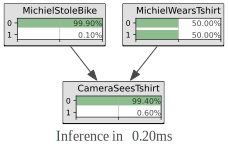

In [ ]:
bn=gum.BayesNet('suspectCamera')

# step 1: creating three nodes
MichielStoleBike=bn.add(gum.LabelizedVariable('MichielStoleBike','MichielStoleBike',2))
CameraSeesTshirt=bn.add(gum.LabelizedVariable('CameraSeesTshirt','CameraSeesTshirt',2))
MichielWearsTshirt=bn.add(gum.LabelizedVariable('MichielWearsTshirt','MichielWearsTshirt',2))

# step 2: creating the arcs between the two nodes
bn.addArc(MichielStoleBike, CameraSeesTshirt)
bn.addArc(MichielWearsTshirt, CameraSeesTshirt)


# step 3: specifying the probability tables

# we assume that there were 1000 people who could have stolen the bike. Michiel is one of them.
bn.cpt("MichielStoleBike")[{}] = [0.999, 0.001]


# we don't know what Michiel is wearing at the time of the theft.
bn.cpt("MichielWearsTshirt")[{}] = [0.5, 0.5]

# CameraSeesTshirt table

# if Michiel didn't steal the bike and didn't wear the T-shirt,
# then there were 6 people out of 1000 who could have been seen by the camera while stealing the bike
bn.cpt("CameraSeesTshirt")[{"MichielStoleBike":0, "MichielWearsTshirt":0}] = [0.994, 0.006]

# if Michiel didn't steal the bike and did wear the T-shirt,
# then there were 5 out of 1000 other people who could have been seen by the camera while stealing the bike
bn.cpt("CameraSeesTshirt")[{"MichielStoleBike":0, "MichielWearsTshirt":1}] = [0.995, 0.005]


# if Michiel did steal the bike and didn't wear the T-shirt,
# then the camera wouldn't have seen the T-shirt on the thief
bn.cpt("CameraSeesTshirt")[{"MichielStoleBike":1, "MichielWearsTshirt":0}] = [1, 0]

# if Michiel did steal the bike and did wear the T-shirt,
# the camera must have seen the T-shirt
bn.cpt("CameraSeesTshirt")[{"MichielStoleBike":1, "MichielWearsTshirt":1}] = [0, 1]


# show the network
gnb.showInference(bn,evs={}) # we show the BN without any evidence set

## Question 1: the network (5p)
1a: Which node represents the evidence in this network? Explain in one sentence. (1p)

The CameraSeesTshirt node represents the evidence in this network because it captures whether the camera detected the thief wearing the T-shirt.

1b: Which node represents a hypothesis about guilt in this network? Explain in one sentence. (1p)

The MichielStoleBike node represents the hypothesis about guilt because it reflects whether Michiel is the one who stole the bike, which is the key question under investigation as Michiel is the main suspect.

1c: What is the prior probability of the (true) hypothesis ($\Pr(H)$)? And what is the prior probability of the false hypothesis ($\Pr(\lnot H)$)? (1p)

The prior probability of the true hypothesis, $\Pr(\text{MichielStoleBike=True})$, is 0.001 (since Michiel is one of 1000 potential suspects). The prior probability of the false hypothesis, $\Pr(\text{MichielStoleBike=False})$, is 0.999 (since the remaining 999 people could have stolen the bike).

1d: Would you know how many people wore "the same type of T-shirt" in a real life case? Give one reason why and one reason why you wouldn't be able to estimate this number. (2p)

In a real-life cenario, among the reasons you would not be able to estimate this number is that the data collected from cameras and observers is unreliable as there are many blind spots that could prevent people from being captured and therefore the data collected would not be precise. A reason it would be possible to estimate this number is that even if the data is unreliable, statistically, the sample of data collected should be significant enough to represent the larger group of people even if it there is a margin of error.

## Question 2: the posterior probability (5p)

Now we want to reason with the evidence. We set the CameraSeenShirt to True (1), and to False (0) for demonstration, and see the posterior probability of MichielStoleBike change. In the networks below, nodes that represent set evidence are shown in orange.

BN when we set that we saw on the camera that the tshirt was seen


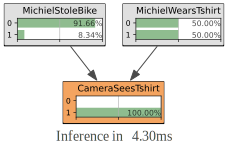

BN when we set that we saw on the camera that the tshirt wasn't seen


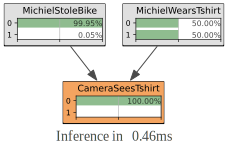

In [ ]:
print("BN when we set that we saw on the camera that the tshirt was seen")
gnb.showInference(bn,evs={"CameraSeesTshirt":1})
print("BN when we set that we saw on the camera that the tshirt wasn't seen")
gnb.showInference(bn,evs={"CameraSeesTshirt":0})

2a: By how much does the posterior change compared to the prior when we set the evidence to 1? (1p)

The posterior increased by 8,24% when the T-shirt was seen on the camera -> (8,34% - 0,1% = 8,24%).

2b: By how much does the posterior change compared to the prior when we set the evidence to 0? (1p)

The posterior decreased by 0,05% when the T-shirt was not seen on the camera -> (0,05% - 0,1% = -0,05%).

2c. The posterior probability of MichielStoleBike given positive evidence is not high. This is because we don't know whether Michiel is wearing the shirt or not. Now imagine that Michiel states "I've worn that shirt the whole evening and at no point did I put on a sweater or coat or anything like that". Now we can set MichielWearsTshirt to 1 (True). Run the code below. What is the resulting posterior probability of $\Pr(\text{MichielStoleBike = True} \mid \text{MichielWearsTshirt = True, CameraSeesTshirt=True})$ ? (1p)




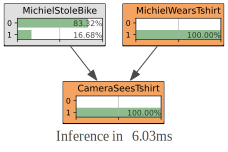

In [ ]:
gnb.showInference(bn,evs={"CameraSeesTshirt":1, "MichielWearsTshirt":1})

2d. If you were a judge and you use this network to reason with, would you convict Michiel based on the posterior probability of MichielStoleBike now that we know he wore the T-shirt and the camera saw someone with the T-shirt steal the bike? Why or why not? (2p)

Even though the posterior probability increased to 16,68%; as a judge, I would not convict Michiel, because the probability is still too low and, therefore, there is just not enough evidence to consider Michiel gulty of the crime, which is, for me, enough for letting him free while more evidence is not presented.

## Question 3: Reasoning about credibility

We interview some people close to the crime scene. Most of them don't remember anything, but a few of them do. In the end we find testimony by Annet. We trust Annet, and believe that if she says that Michiel stole the bike, he very probably (0.999) did it, and if she says he didn't, then he probably didn't do it.

We add the new evidence of the testimony to the Bayesian Network.

In [ ]:
# re-run old network automatically
bn=gum.BayesNet('suspectCamera')

MichielStoleBike=bn.add(gum.LabelizedVariable('MichielStoleBike','MichielStoleBike',2))
CameraSeesTshirt=bn.add(gum.LabelizedVariable('CameraSeesTshirt','CameraSeesTshirt',2))
MichielWearsTshirt=bn.add(gum.LabelizedVariable('MichielWearsTshirt','MichielWearsTshirt',2))

bn.addArc(MichielStoleBike, CameraSeesTshirt)
bn.addArc(MichielWearsTshirt, CameraSeesTshirt)

bn.cpt("MichielStoleBike")[{}] = [0.999, 0.001]
bn.cpt("MichielWearsTshirt")[{}] = [0.5, 0.5]

bn.cpt("CameraSeesTshirt")[{"MichielStoleBike":0, "MichielWearsTshirt":0}] = [0.994, 0.006]
bn.cpt("CameraSeesTshirt")[{"MichielStoleBike":0, "MichielWearsTshirt":1}] = [0.995, 0.005]
bn.cpt("CameraSeesTshirt")[{"MichielStoleBike":1, "MichielWearsTshirt":0}] = [1, 0]
bn.cpt("CameraSeesTshirt")[{"MichielStoleBike":1, "MichielWearsTshirt":1}] = [0, 1]

# show the network

# new: adding testimony

testimonyAnnet =bn.add(gum.LabelizedVariable('TestimonyAnnet','TestimonyAnnet',2))

bn.addArc(MichielStoleBike, testimonyAnnet)


bn.cpt("TestimonyAnnet")[{"MichielStoleBike":0}] = [0.999, 0.001]
bn.cpt("TestimonyAnnet")[{"MichielStoleBike":1}] = [0.001, 0.999]


In [ ]:
gnb.showInference(bn,evs={"MichielWearsTshirt":1, "CameraSeesTshirt":1, "TestimonyAnnet":1})
gnb.showInference(bn,evs={"MichielWearsTshirt":1, "CameraSeesTshirt":1, "TestimonyAnnet":0})

### Question 3 Part 1 (5p)

3a. We have added a new piece of evidence. When we assume CameraSeesTshirt is true, and MichielWearsTshirt is true, what is the posterior 1) when Annet states that they saw Michiel steal, and 2) when Annet states that they definitely didn't see Michiel steal? (2p)


3b. Annet's statement of seeing Michiel steal should affect your belief in Michiel's guilt, compared to the situation in which we only have the camera as evidence. Would you now be willing to convict him? Explain why in one sentence (1p)


3c. Now imagine that we do not know whether Michiel was wearing the T-shirt, but we do have Annet's testimony and the camera. What is the posterior probability of MichielStoleBike? What is the probability of MichielWearsTshirt? Explain qualitatively in a few sentences why MichielWearsTshirt has the value that it has. (2p)


### Question 3 part 2 (7p)
We now learn something new about Annet, which is that she might not be a credible witness. We can represent credibility using the credibility idiom (also known as the accuracy idiom):

In [ ]:
credibilityAnnet =bn.add(gum.LabelizedVariable('CredibilityAnnet','CredibilityAnnet',2))

bn.addArc(credibilityAnnet, testimonyAnnet)

# initially, without any evidence, we don't know if A is credible or not.
bn.cpt("CredibilityAnnet")[{}] = [0.5, 0.5]

# now we need to update the cpts of testimony A because we got a new parent
# if A is credible, we keep having the same cpts
bn.cpt("TestimonyAnnet")[{"MichielStoleBike":0, "CredibilityAnnet":1}] = [0.999, 0.001]
bn.cpt("TestimonyAnnet")[{"MichielStoleBike":1, "CredibilityAnnet":1}] = [0.001, 0.999]

# if A is not credible, we do not trust anything they say.
bn.cpt("TestimonyAnnet")[{"MichielStoleBike":0, "CredibilityAnnet":0}] = [0.5, 0.5]
bn.cpt("TestimonyAnnet")[{"MichielStoleBike":1, "CredibilityAnnet":0}] = [0.5, 0.5]


In [ ]:
gnb.showInference(bn,evs={})


3d: Give one reason that would make Annet an unreliable source. Does the lack of credibility of Annet help or hurt Michiel? (2p)


3e: Set MichielWearsTshirt=True, CameraSeesTshirt=True. Imagine that we trust Annet's testimony that Michiel stole the bike and set the credibility node accordingly. What is now our posterior probability of guilt for Michiel? Is it the same as before we introduced the credibility node? (1p)


3f: Set MichielWearsTshirt=True, CameraSeesTshirt=True. Now set the credibility of Annet to false. What is our posterior probabilty of guilt for Michiel? Describe the effect of the testimony of Annet on the posterior probability. (2p)


3g: Change the CPT of Annet's testimony node such that when Annet's credibility is 0, we will actively believe the opposite of what Annet's saying (so if Annet says Michiel did it, he didn't do it, and vice versa). Explain the two different interpretations of "credibility" (2p)

In [ ]:
#4e
gnb.showInference(bn,evs={"MichielWearsTshirt": 1, "CameraSeesTshirt":1,
                          "CredibilityAnnet":1, "TestimonyAnnet":1})
#4f
gnb.showInference(bn,evs={"MichielWearsTshirt": 1,"CameraSeesTshirt":1,
                          "CredibilityAnnet":0, "TestimonyAnnet":1})

In [ ]:
#4g
# reverse credibility.

# mixed up credibility
bn.cpt("TestimonyAnnet")[{"MichielStoleBike":0, "CredibilityAnnet":0}] = [0.001, 0.999]
bn.cpt("TestimonyAnnet")[{"MichielStoleBike":1, "CredibilityAnnet":0}] = [0.999, 0.001]


gnb.showInference(bn,evs={"CameraSeesTshirt":1,
                          "CredibilityAnnet":0, "TestimonyAnnet":1})

gnb.showInference(bn,evs={"CameraSeesTshirt":1,
                          "CredibilityAnnet":0, "TestimonyAnnet":0})


## Question 4: Adding another piece of evidence (8p)

Now imagine that you are taking over as detective. Imagine a relevant piece of evidence that you could find, that would either help or hurt the defendant. Add this piece of evidence to the network (you can choose to add it either with or without credibility idiom).

1. Show the final model with evidence attached (2p)



2. Explain (in no more than a paragraph) why you chose this piece of evidence. (2p)


3. Explain (in no more than a paragraph) how you calculated, estimated, or otherwise produced the numbers. (2p)


4. Explain (in no more than a paragraph) how setting the new piece of evidence affects the posterior probability of MichielStoleBike. (2p)


## Question 5 (5p)

 Do you think we can use Bayesian Networks for real crime investigations? Why or why not? (~100 words)